In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nab/README.md
/kaggle/input/nab/realKnownCause/realKnownCause/rogue_agent_key_updown.csv
/kaggle/input/nab/realKnownCause/realKnownCause/ec2_request_latency_system_failure.csv
/kaggle/input/nab/realKnownCause/realKnownCause/ambient_temperature_system_failure.csv
/kaggle/input/nab/realKnownCause/realKnownCause/nyc_taxi.csv
/kaggle/input/nab/realKnownCause/realKnownCause/rogue_agent_key_hold.csv
/kaggle/input/nab/realKnownCause/realKnownCause/machine_temperature_system_failure.csv
/kaggle/input/nab/realKnownCause/realKnownCause/cpu_utilization_asg_misconfiguration.csv
/kaggle/input/nab/realTraffic/realTraffic/TravelTime_387.csv
/kaggle/input/nab/realTraffic/realTraffic/speed_6005.csv
/kaggle/input/nab/realTraffic/realTraffic/speed_t4013.csv
/kaggle/input/nab/realTraffic/realTraffic/occupancy_t4013.csv
/kaggle/input/nab/realTraffic/realTraffic/speed_7578.csv
/kaggle/input/nab/realTraffic/realTraffic/occupancy_6005.csv
/kaggle/input/nab/realTraffic/realTraffic/TravelTime_451.

# Dataset

we will use all : /kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/

**exploration**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import json
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_disk = pd.read_csv('/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_disk_write_bytes_c0d644.csv', parse_dates=['timestamp'])
df_disk.head(50)

,timestamp,value
0,2014-04-02 14:25:00,0.0
1,2014-04-02 14:30:00,0.0
2,2014-04-02 14:35:00,0.0
3,2014-04-02 14:40:00,0.0
4,2014-04-02 14:45:00,0.0
5,2014-04-02 14:50:00,0.0
6,2014-04-02 14:55:00,0.0
7,2014-04-02 15:00:00,19949200.0
8,2014-04-02 15:05:00,48951300.0
9,2014-04-02 15:10:00,431199000.0


In [5]:
df_network = pd.read_csv('/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_network_in_257a54.csv', parse_dates=['timestamp'])
df_network.head()

,timestamp,value
0,2014-04-10 00:04:00,251643.0
1,2014-04-10 00:09:00,3203510.0
2,2014-04-10 00:14:00,287397.0
3,2014-04-10 00:19:00,238944.0
4,2014-04-10 00:24:00,245880.0


In [6]:
df = pd.read_csv('/kaggle/input/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv', parse_dates=['timestamp'])
df.head()

,timestamp,value
0,2014-02-14 14:27:00,51.846
1,2014-02-14 14:32:00,44.508
2,2014-02-14 14:37:00,41.244
3,2014-02-14 14:42:00,48.568
4,2014-02-14 14:47:00,46.714


In [7]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  4032 non-null   datetime64[ns]
 1   value      4032 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 63.1 KB


In [9]:
print("\nStatistiques descriptives :")
print(df['value'].describe())


Statistiques descriptives :
count    4032.000000
mean       43.110372
std         4.303565
min        34.766000
25%        39.296000
50%        42.918000
75%        46.006000
max        68.092000
Name: value, dtype: float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  4032 non-null   datetime64[ns]
 1   value      4032 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 63.1 KB


In [11]:
# Charger les annotations d'anomalies
with open("/kaggle/input/nab-combined-labels/combined_labels.json", 'r') as f:
    labels = json.load(f)
anomalies = labels.get("realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv", [])
true_anomalies = [pd.to_datetime(t) for t in anomalies]
print("Anomalies annotées :", true_anomalies)

Anomalies annotées : [Timestamp('2014-02-19 00:22:00'), Timestamp('2014-02-24 18:37:00')]


In [12]:
df['is-anomaly'] = df['timestamp'].apply(lambda t: -1 if t in true_anomalies else 1)


In [13]:
df.head()

,timestamp,value,is-anomaly
0,2014-02-14 14:27:00,51.846,1
1,2014-02-14 14:32:00,44.508,1
2,2014-02-14 14:37:00,41.244,1
3,2014-02-14 14:42:00,48.568,1
4,2014-02-14 14:47:00,46.714,1


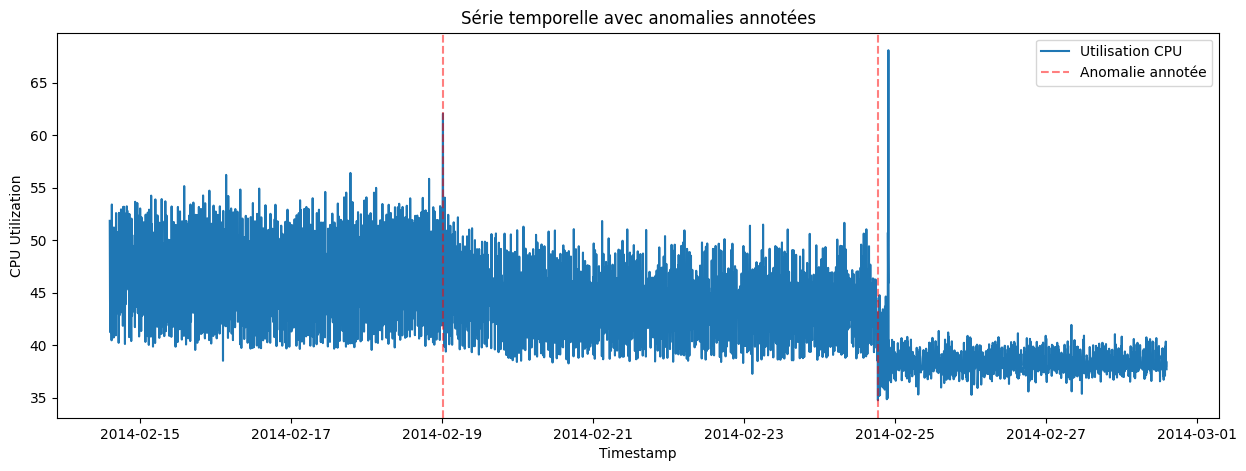

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(df['timestamp'], df['value'], label='Utilisation CPU')
for t in true_anomalies:
    plt.axvline(t, color='red', linestyle='--', alpha=0.5, label='Anomalie annotée' if t == true_anomalies[0] else "")
plt.xlabel('Timestamp')
plt.ylabel('CPU Utilization')
plt.title('Série temporelle avec anomalies annotées')
plt.legend()
plt.show()

In [15]:
from statsmodels.tsa.seasonal import STL
stl = STL(df['value'], period=288)  
result = stl.fit()
trend = result.trend
seasonal = result.seasonal
resid = result.resid

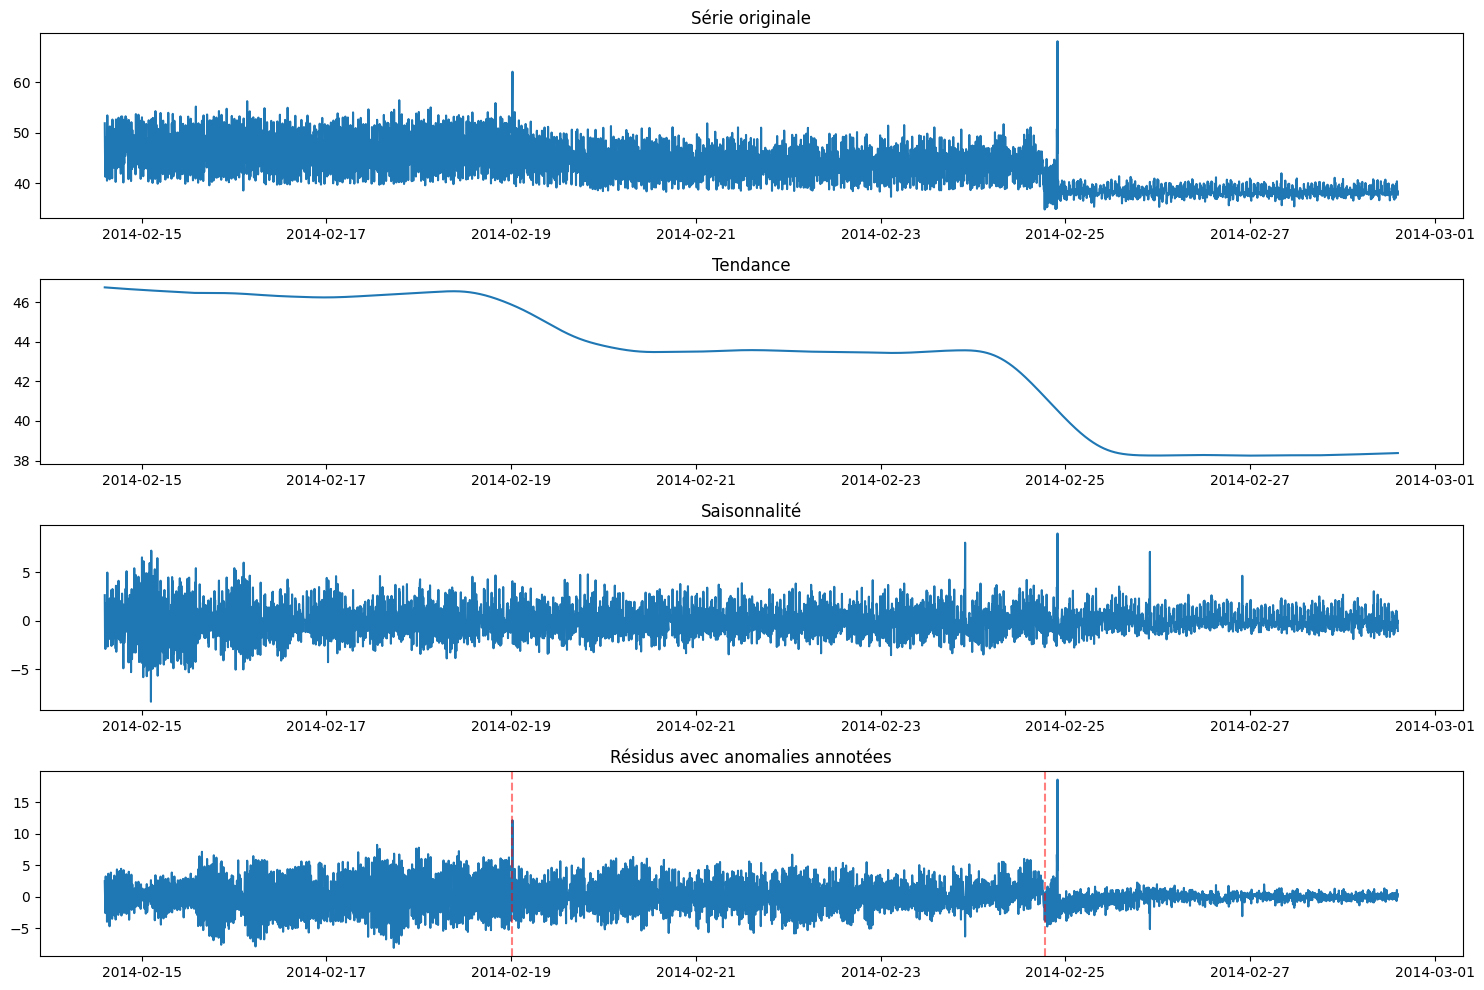

In [16]:
plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 1)
plt.plot(df['timestamp'], df['value'], label='Série originale')
plt.title('Série originale')
plt.subplot(4, 1, 2)
plt.plot(df['timestamp'], trend, label='Tendance')
plt.title('Tendance')
plt.subplot(4, 1, 3)
plt.plot(df['timestamp'], seasonal, label='Saisonnalité')
plt.title('Saisonnalité')
plt.subplot(4, 1, 4)
plt.plot(df['timestamp'], resid, label='Résidus')
for t in true_anomalies:
    plt.axvline(t, color='red', linestyle='--', alpha=0.5)
plt.title('Résidus avec anomalies annotées')
plt.tight_layout()
plt.show()

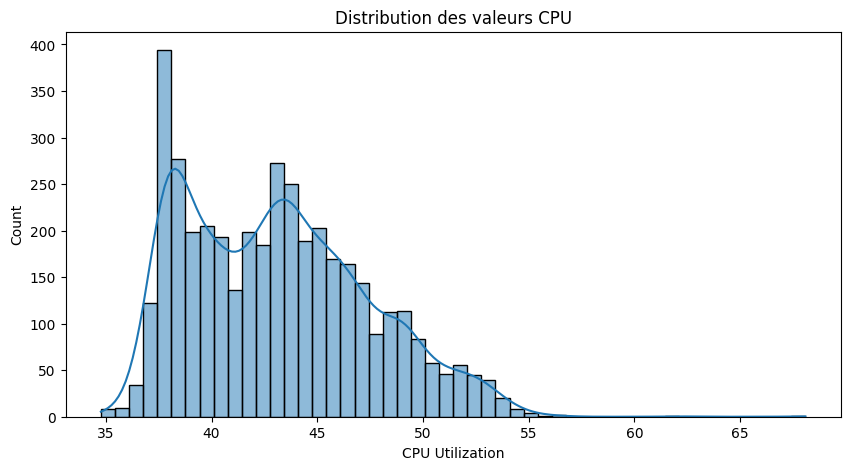

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['value'], bins=50, kde=True)
plt.title('Distribution des valeurs CPU')
plt.xlabel('CPU Utilization')
plt.show()

# Z-score

Robust Z-score works only if the data is close to a normal distribution.


The MAD is not equal to 0 (happens when more than 50% of the data has the same value)

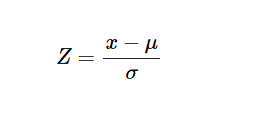


This formula calculates how many standard deviations an observation 𝑥 x is away from the mean 𝜇 μ.

However, the traditional Z-score is sensitive to outliers because both the mean and standard deviation can be skewed by extreme values.

To address this, we use a robust version of the Z-score based on the Median Absolute Deviation (MAD), which relies on the median instead of the mean. This makes it more stable in the presence of anomalies.

Outliers affect Z-score, therefore we need something better. The Robust Z-Score method uses the median instead of the mean.


MAD is scaled using a constant factor of 1.4826, which is the reciprocal of 0.6745. Here's why:

0.6745 is approximately the 75th percentile of the standard normal distribution’s absolute deviations from the median.

Scaling by 1 / 0.6745 ≈ 1.4826 adjusts MAD to be comparable to the standard deviation when data is normally distributed.

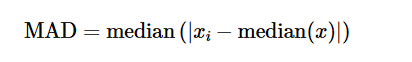

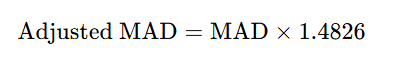


This adjustment ensures that the MAD can be used similarly to standard deviation for outlier detection, but remains robust to noise and anomalies.



In [18]:
#calcul Z-score
mean_val = df['value'].mean()
std_val = df['value'].std()
df['z_score_classic'] = (df['value'] - mean_val) / std_val

Not a normal distribution (scewed left quite far). Plus it looks like the median (vertial black line) is on more than 50% of the data.

In [19]:
thresholds = [3,3.5]
for threshold in thresholds:
    anomalies = df[np.abs(df['z_score_classic']) > threshold]
    anomaly_timestamps = anomalies['timestamp'].tolist()
    
    # Comparer avec les annotations
    detected = set(anomaly_timestamps)
    true = set(true_anomalies)
    true_positives = len(detected.intersection(true))
    precision = true_positives / len(detected) if detected else 0
    recall = true_positives / len(true) if true else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nSeuil Z-score = {threshold}:")
    print(f"Nombre d'anomalies détectées : {len(anomaly_timestamps)}")
    print(f"Précision : {precision:.2f}, Rappel : {recall:.2f}, F1-Score : {f1_score:.2f}")


Seuil Z-score = 3:
Nombre d'anomalies détectées : 4
Précision : 0.25, Rappel : 0.50, F1-Score : 0.33

Seuil Z-score = 3.5:
Nombre d'anomalies détectées : 2
Précision : 0.50, Rappel : 0.50, F1-Score : 0.50


In [20]:
from scipy.stats import median_abs_deviation

mad = median_abs_deviation(df['value'])
median = np.median(df['value'])

print("MAD: " + str(mad))
print("Median: " + str(median))

def compute_robust_z_score(x):
    return 0.6745*(x-median)/mad

MAD: 3.363999999999997
Median: 42.918


In [21]:
# Compute the robust Z-score for each sample
df['z-score_withMad'] = df['value'].apply(compute_robust_z_score)
df.head()

,timestamp,value,is-anomaly,z_score_classic,z-score_withMad
0,2014-02-14 14:27:00,51.846,1,2.029859,1.790112
1,2014-02-14 14:32:00,44.508,1,0.324761,0.318804
2,2014-02-14 14:37:00,41.244,1,-0.433680,-0.335646
3,2014-02-14 14:42:00,48.568,1,1.268165,1.132855
4,2014-02-14 14:47:00,46.714,1,0.837359,0.761118


In [22]:
#detect anomaly 
df['baseline']=1
df.loc[df['z-score_withMad']>=3.5, 'baseline'] = -1
df.loc[df['z-score_withMad']<=-3.5, 'baseline'] = -1
df.head()

,timestamp,value,is-anomaly,z_score_classic,z-score_withMad,baseline
0,2014-02-14 14:27:00,51.846,1,2.029859,1.790112,1
1,2014-02-14 14:32:00,44.508,1,0.324761,0.318804,1
2,2014-02-14 14:37:00,41.244,1,-0.433680,-0.335646,1
3,2014-02-14 14:42:00,48.568,1,1.268165,1.132855,1
4,2014-02-14 14:47:00,46.714,1,0.837359,0.761118,1


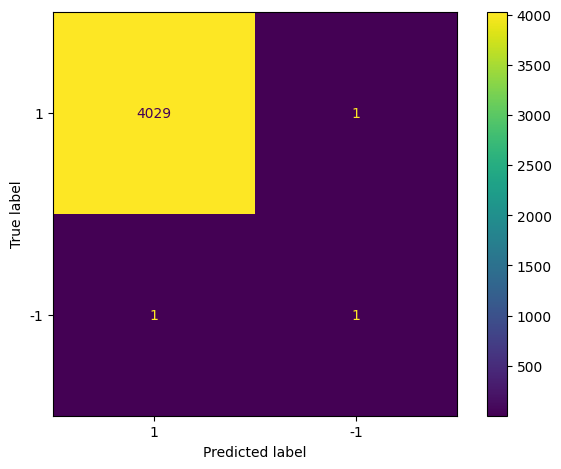

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix
cm = confusion_matrix(df['is-anomaly'], df['baseline'], labels=[1,-1])
disp_cm = ConfusionMatrixDisplay(cm, display_labels=[1,-1])
disp_cm.plot();
plt.grid(False)
plt.tight_layout()

the result is not bad 

# IQR

**Another threshold detector** , which is **an Interquartile Range (IQR)**
The Interquartile Range (IQR) is a measure of statistical dispersion, representing the spread of the middle 50% of a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1):


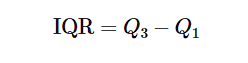

In [24]:
!pip install adtk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00


In [25]:
from adtk.detector import *

In [26]:
df.set_index('timestamp', inplace=True)


In [27]:

iqr_detector = InterQuartileRangeAD(c=1.5)
iqr_anomalies = iqr_detector.fit_detect(df[['value']])


In [28]:
df['iqr_anomaly'] = iqr_anomalies.astype(int)


In [29]:
df['is-anomaly'] = df['is-anomaly'].apply(lambda x: 1 if x == -1 else 0)


              precision    recall  f1-score   support

           0     0.9998    0.9993    0.9995      4030
           1     0.2500    0.5000    0.3333         2

    accuracy                         0.9990      4032
   macro avg     0.6249    0.7496    0.6664      4032
weighted avg     0.9994    0.9990    0.9992      4032



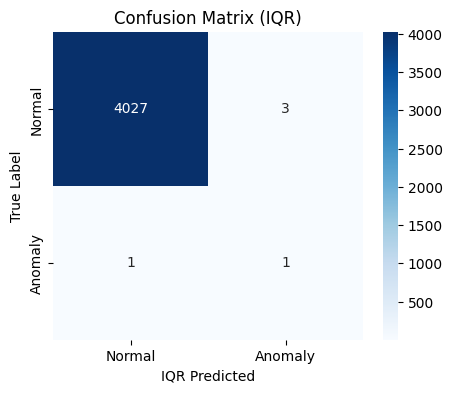

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher les métriques
print(classification_report(df['is-anomaly'], df['iqr_anomaly'], digits=4))

# Matrice de confusion
cm = confusion_matrix(df['is-anomaly'], df['iqr_anomaly'])

# Affichage graphique
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel("IQR Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix (IQR)")
plt.show()


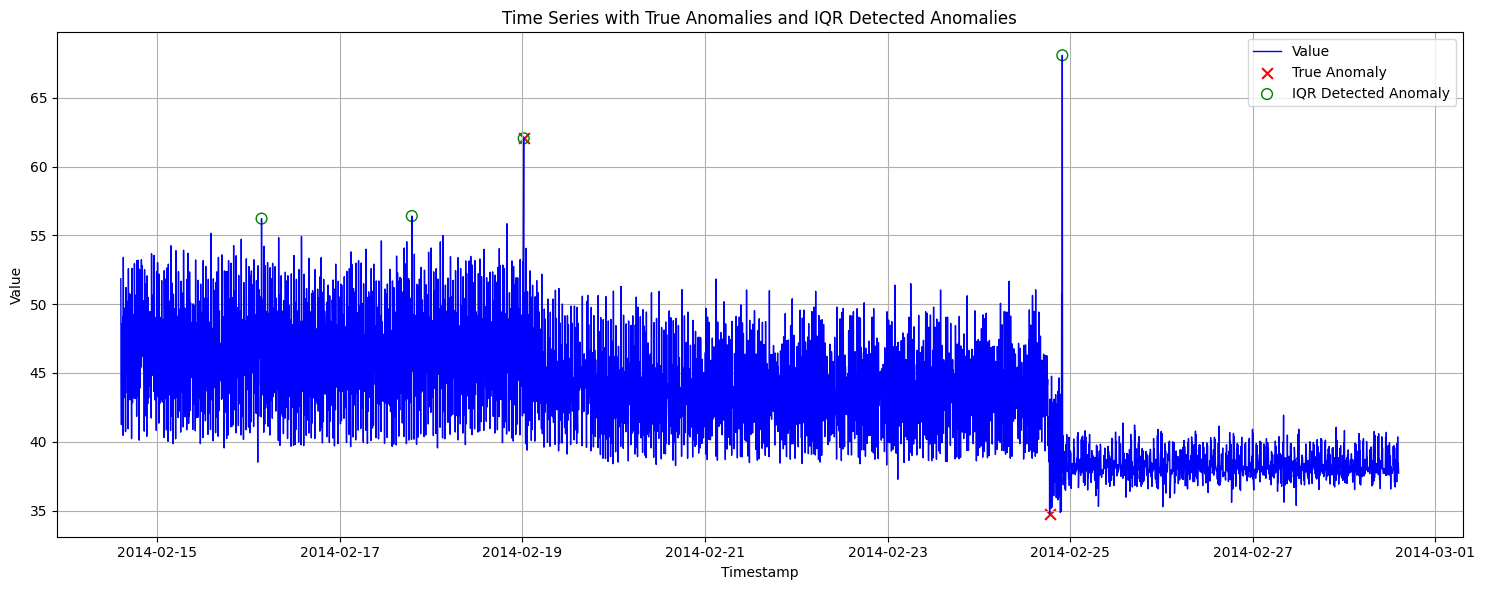

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# Série temporelle
plt.plot(df.index, df['value'], label='Value', color='blue', linewidth=1)

# Vraies anomalies (is-anomaly == 1)
true_anomalies = df[df['is-anomaly'] == 1]
plt.scatter(true_anomalies.index, true_anomalies['value'], color='red', label='True Anomaly', marker='x', s=60)

# Anomalies détectées par IQR (iqr_anomaly == 1)
detected_anomalies = df[df['iqr_anomaly'] == 1]
plt.scatter(detected_anomalies.index, detected_anomalies['value'], color='green', label='IQR Detected Anomaly', marker='o', facecolors='none', s=60)

# Labels & légende
plt.title("Time Series with True Anomalies and IQR Detected Anomalies")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


the Z score is  better

# isolation forest

Tree based algorithm to detect outliers

Partitions the data to isolate points.

In [32]:
from sklearn.ensemble import IsolationForest


In [33]:
df.head()

,value,is-anomaly,z_score_classic,z-score_withMad,baseline,iqr_anomaly
timestamp,,,,,,
2014-02-14 14:27:00,51.846,0,2.029859,1.790112,1,0
2014-02-14 14:32:00,44.508,0,0.324761,0.318804,1,0
2014-02-14 14:37:00,41.244,0,-0.433680,-0.335646,1,0
2014-02-14 14:42:00,48.568,0,1.268165,1.132855,1,0
2014-02-14 14:47:00,46.714,0,0.837359,0.761118,1,0


In [34]:
from sklearn.model_selection import train_test_split


# Split the data (keep on anomaly in the test set)
df_anomalies = df[df['is-anomaly'] == 1]
df_normals = df[df['is-anomaly'] == 0]

anomaly_train = df_anomalies.iloc[[0]]
anomaly_test = df_anomalies.iloc[[1]]

remaining_anomalies = df_anomalies.drop(anomaly_train.index.union(anomaly_test.index))

df_normals_train, df_normals_test = train_test_split(df_normals, test_size=0.3, random_state=42)

df_train = pd.concat([df_normals_train, anomaly_train]).sort_index()
df_test = pd.concat([df_normals_test, anomaly_test, remaining_anomalies]).sort_index()


In [35]:
contamination = 1/len(df_train)
print(contamination)

0.00035435861091424523


In [36]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01, random_state=42)
model.fit(df_train[['value']])

df_test['pred'] = model.predict(df_test[['value']])  # -1 = anomalie, 1 = normal
df_test['pred_anomaly'] = df_test['pred'].apply(lambda x: 1 if x == -1 else 0)


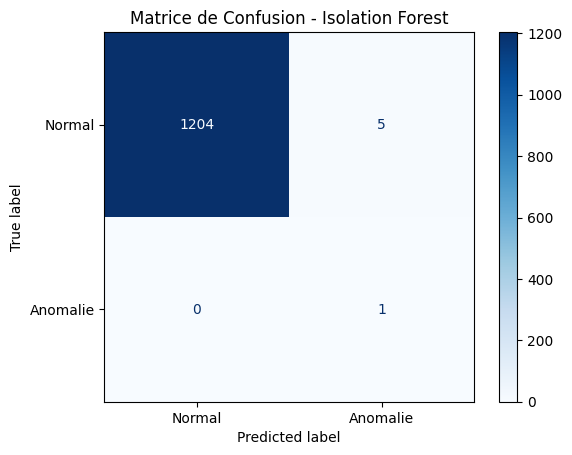

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(df_test['is-anomaly'], df_test['pred_anomaly'])

# Afficher
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomalie"])
disp.plot(cmap="Blues")
plt.title("Matrice de Confusion - Isolation Forest")
plt.show()


In [38]:
print("Classification Report :\n")
print(classification_report(df_test['is-anomaly'], df_test['pred_anomaly']))


Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1209
           1       0.17      1.00      0.29         1

    accuracy                           1.00      1210
   macro avg       0.58      1.00      0.64      1210
weighted avg       1.00      1.00      1.00      1210



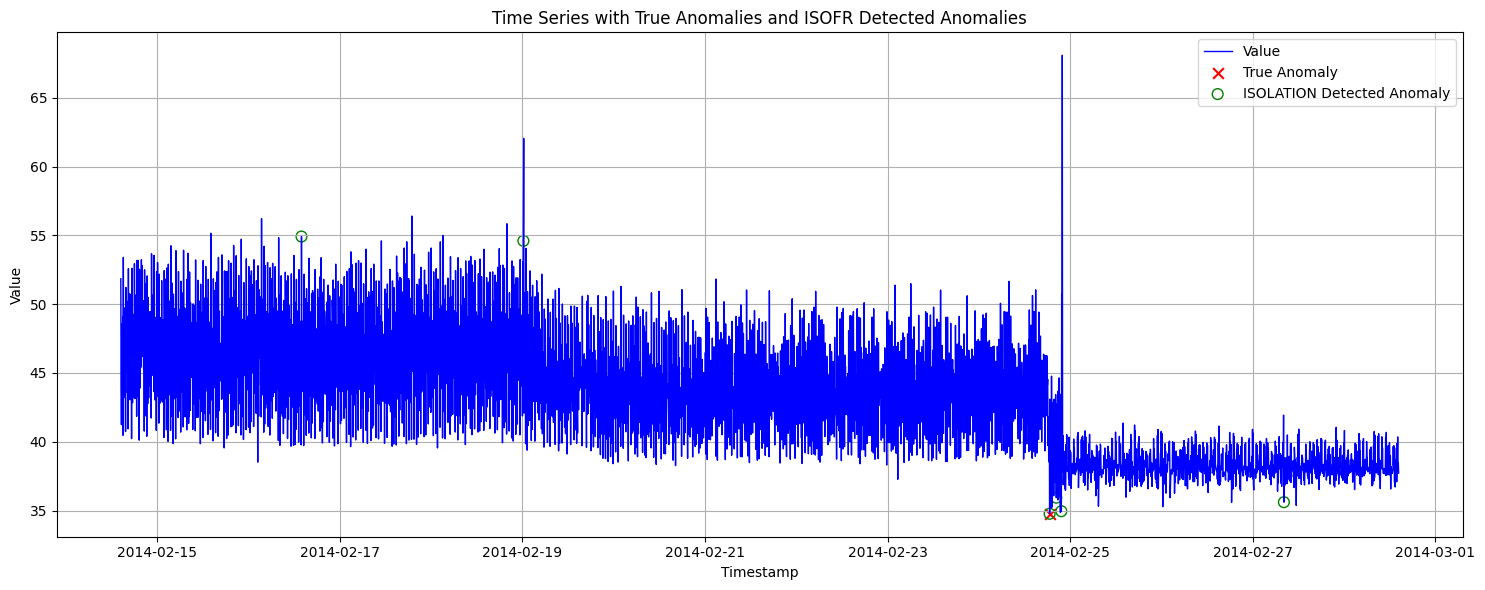

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.plot(df.index, df['value'], label='Value', color='blue', linewidth=1)

true_anomalies = df_test[df_test['is-anomaly'] == 1]
plt.scatter(true_anomalies.index, true_anomalies['value'], color='red', label='True Anomaly', marker='x', s=60)

detected_anomalies = df_test[df_test['pred_anomaly'] == 1]
plt.scatter(detected_anomalies.index, detected_anomalies['value'], color='green', label='ISOLATION Detected Anomaly', marker='o', facecolors='none', s=60)

plt.title("Time Series with True Anomalies and ISOFR Detected Anomalies")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Local Outlier Factor (LOF)

If the density is smaller, then the point is isolated, and therefore an outlier.
Based on Reachability Distance

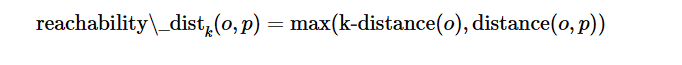

In [40]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=contamination, novelty=True)

lof.fit(df_train[['value']])

LocalOutlierFactor(contamination=0.00035435861091424523, novelty=True)

In [41]:
df_test['pred_anomaly_lof'] = lof.predict(df_test[['value']])

df_test['pred_anomaly_lof'] = df_test['pred_anomaly_lof'].map({1: 0, -1: 1})


In [42]:
df_test['is-anomaly'].value_counts()

is-anomaly
0    1209
1       1
Name: count, dtype: int64

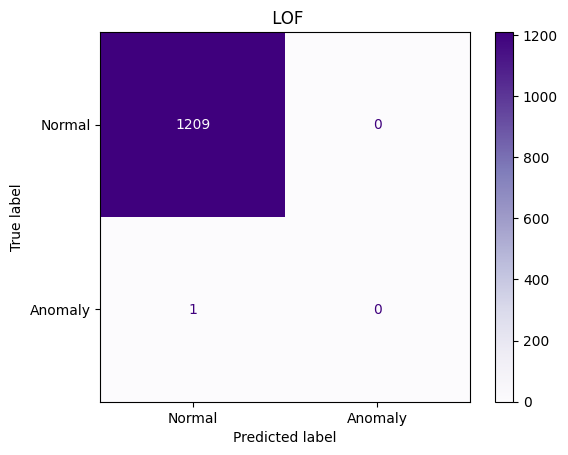

In [43]:
cm = confusion_matrix(df_test['is-anomaly'], df_test['pred_anomaly_lof'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot(cmap="Purples")
plt.title(" LOF")
plt.show()


In [44]:
print(classification_report(df_test['is-anomaly'], df_test['pred_anomaly']))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1209
           1       0.17      1.00      0.29         1

    accuracy                           1.00      1210
   macro avg       0.58      1.00      0.64      1210
weighted avg       1.00      1.00      1.00      1210



# One SVM

In [45]:
from sklearn.svm import OneClassSVM

nu = contamination
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=nu)


In [46]:
ocsvm.fit(df_train[['value']])


OneClassSVM(gamma='auto', nu=0.00035435861091424523)

In [47]:
df_test['pred_anomaly_onesvm'] = ocsvm.predict(df_test[['value']])

df_test['pred_anomaly_onesvm'] = df_test['pred_anomaly_onesvm'].map({1: 0, -1: 1})


              precision    recall  f1-score   support

           0       1.00      0.67      0.81      1209
           1       0.00      1.00      0.01         1

    accuracy                           0.68      1210
   macro avg       0.50      0.84      0.41      1210
weighted avg       1.00      0.68      0.81      1210



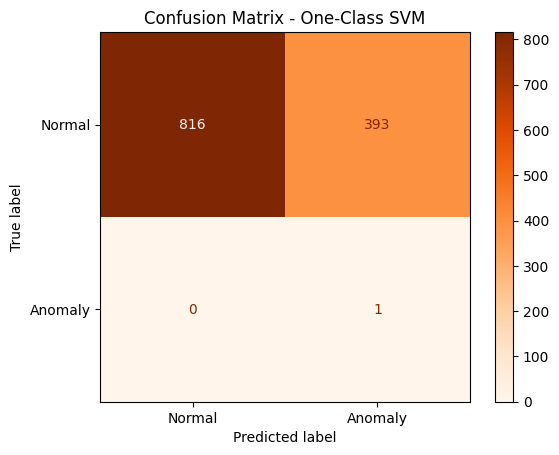

In [48]:
print(classification_report(df_test['is-anomaly'], df_test['pred_anomaly_onesvm']))

cm = confusion_matrix(df_test['is-anomaly'], df_test['pred_anomaly_onesvm'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - One-Class SVM")
plt.show()


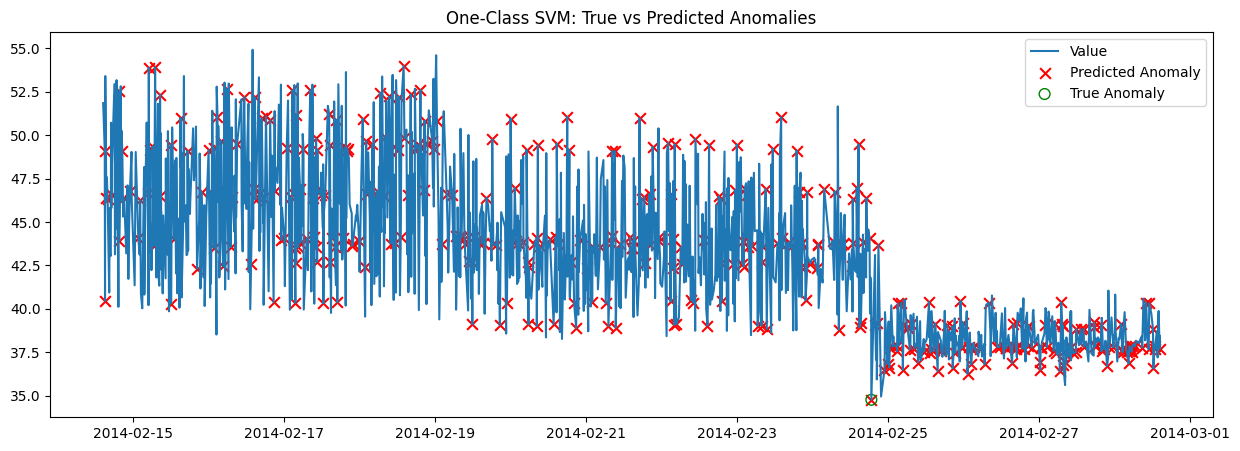

In [49]:
plt.figure(figsize=(15,5))
plt.plot(df_test.index, df_test['value'], label='Value')
plt.scatter(df_test[df_test['pred_anomaly_onesvm'] == 1].index, df_test[df_test['pred_anomaly_onesvm'] == 1]['value'], 
            color='red', label='Predicted Anomaly', marker='x', s=60)
plt.scatter(df_test[df_test['is-anomaly'] == 1].index, df_test[df_test['is-anomaly'] == 1]['value'], 
            color='green', label='True Anomaly', marker='o', s=60, facecolors='none')
plt.legend()
plt.title('One-Class SVM: True vs Predicted Anomalies')
plt.show()
